In [1]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from textblob import TextBlob
import pandas as pd

In [2]:
# Lendo o arquivo e selecionando apenas a coluna Comment

df= pd.read_csv('C:/ProjetosPython/sentiment_analysis_nlp/data/twitter_reviews.csv')

df = df[['Comment']]

df

,Comment
0,Twitter's obsession with turning itself into t...
1,Absolute rubbish. It still keeps refreshing af...
2,The most recent update has ruined this app. Th...
3,No closed caption (cc) button is present to di...
4,This app is frustrating as heck. When you're s...
...,...
1195,graet
1196,I like
1197,Great app
1198,5 star for Elon Musk ✌️


In [3]:
# Calculando o Sentimento
df['Sentiment'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Tokenização das palavras
df['Tokens'] = df['Comment'].apply(lambda x: word_tokenize(x))

# Tagging de Partes do Discurso (POS Tags)
df['Pos_tags'] = df['Tokens'].apply(lambda x: pos_tag(x))


In [4]:
# Logica para classificar os sentimentos com base na pontuação do polarity score

def classificar_sentimento(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"    

In [5]:
# Aplicando a função de classificação de sentimento ao DataFrame

df['Sentiment_Classification'] = df['Sentiment'].apply(classificar_sentimento)

In [6]:
# Exibir as alterações feitas no DataFrame

df[['Comment', 'Tokens', 'Pos_tags', 'Sentiment', 'Sentiment_Classification']]

,Comment,Tokens,Pos_tags,Sentiment,Sentiment_Classification
0,Twitter's obsession with turning itself into t...,"[Twitter, 's, obsession, with, turning, itself...","[(Twitter, NNP), ('s, POS), (obsession, NN), (...",0.140741,Positive
1,Absolute rubbish. It still keeps refreshing af...,"[Absolute, rubbish, ., It, still, keeps, refre...","[(Absolute, NNP), (rubbish, NN), (., .), (It, ...",0.130000,Positive
2,The most recent update has ruined this app. Th...,"[The, most, recent, update, has, ruined, this,...","[(The, DT), (most, RBS), (recent, JJ), (update...",-0.036071,Negative
3,No closed caption (cc) button is present to di...,"[No, closed, caption, (, cc, ), button, is, pr...","[(No, DT), (closed, JJ), (caption, NN), ((, ()...",0.034280,Positive
4,This app is frustrating as heck. When you're s...,"[This, app, is, frustrating, as, heck, ., When...","[(This, DT), (app, NN), (is, VBZ), (frustratin...",-0.151852,Negative
...,...,...,...,...,...
1195,graet,[graet],"[(graet, NN)]",0.000000,Neutral
1196,I like,"[I, like]","[(I, PRP), (like, VBP)]",0.000000,Neutral
1197,Great app,"[Great, app]","[(Great, NNP), (app, NN)]",0.800000,Positive
1198,5 star for Elon Musk ✌️,"[5, star, for, Elon, Musk, ✌️]","[(5, CD), (star, NN), (for, IN), (Elon, NNP), ...",0.000000,Neutral


In [7]:
from wordcloud import WordCloud

# alocando os comentários em uma lista
list_comments = df['Comment'].to_list()


len(list_comments)

1200

In [8]:
# juntando as frases dos comentários em um parágrafo
paragraph = "".join(list_comments)

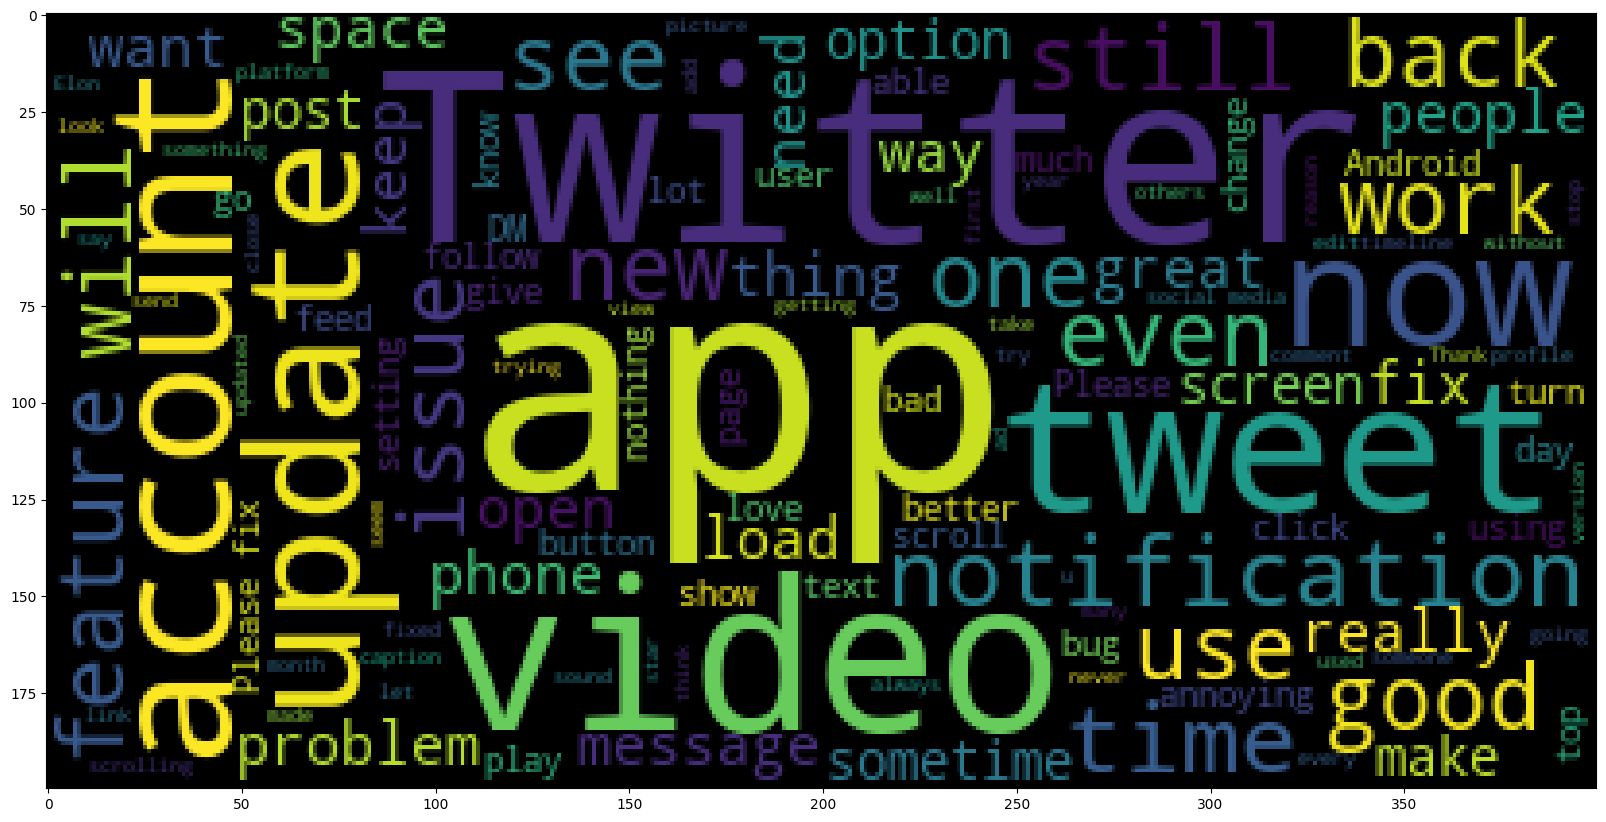

In [9]:
import matplotlib.pyplot as plt

# Exibindo o WordCloud
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(paragraph))

In [10]:
# Selecionando apenas os comentários positivos
positiveComments = df.loc[df.Sentiment_Classification == "Positive", :]

In [11]:
# alocando os comentários positivos em uma lista
positiveList= positiveComments['Comment'].to_list()

In [12]:
# juntando as frases dos comentários positivos em um parágrafo
positiveParagraph = "".join(positiveList)

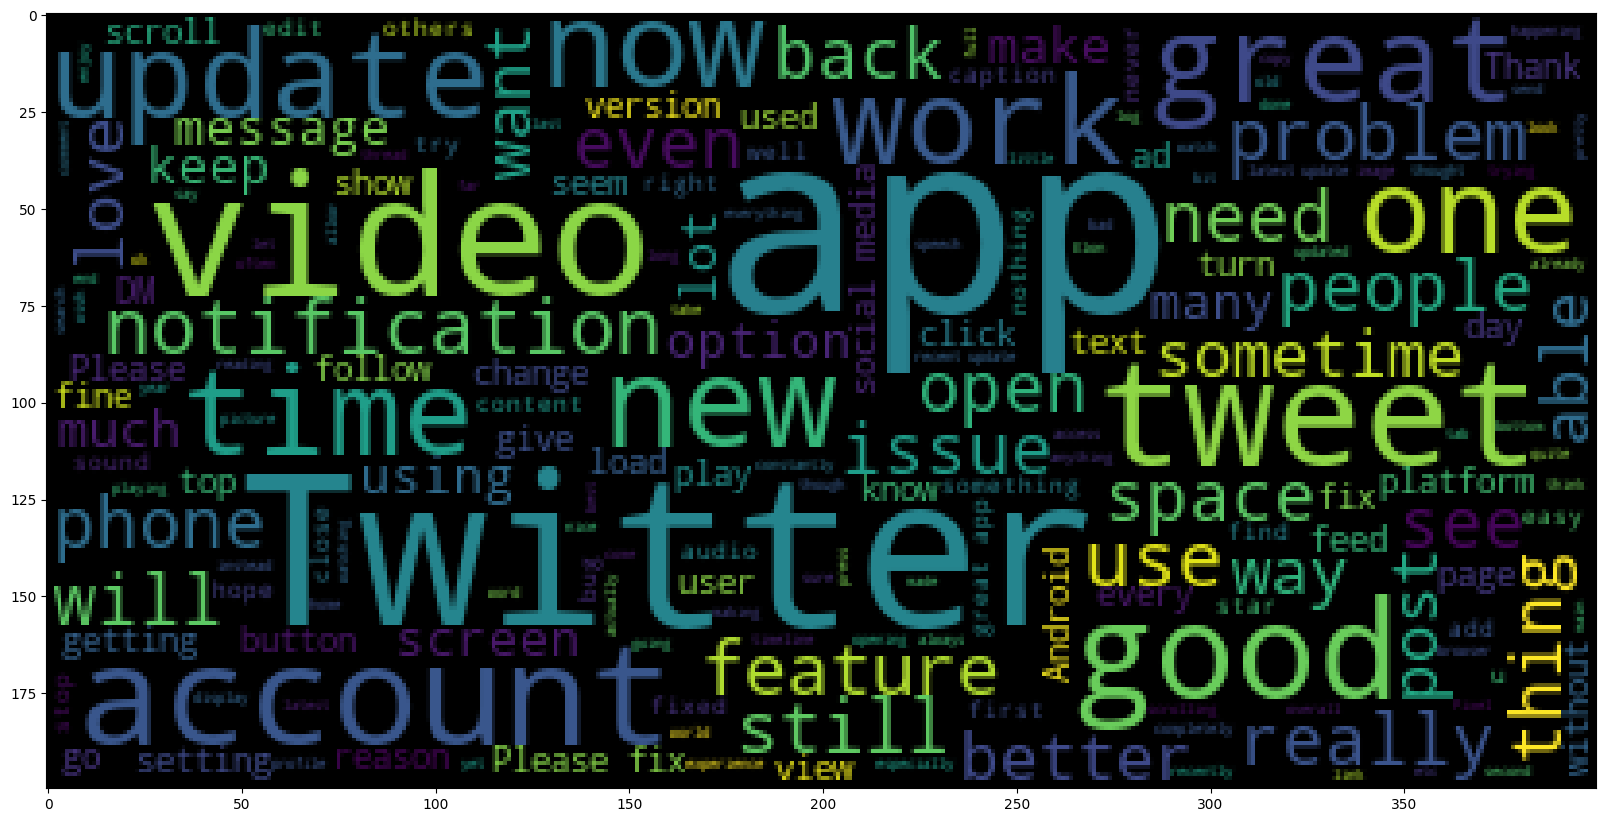

In [13]:
# exibindo WordCloud das palavras positivas
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(positiveParagraph))

In [14]:
# Selecionando apenas os comentários negativos
negativeComments = df.loc[df.Sentiment_Classification == "Negative", :]

In [15]:
# alocando os comentários negativos em uma lista
negativeList= negativeComments['Comment'].to_list()

In [16]:
# juntando as frases dos comentários negativos em um parágrafo
negativeParagraph = "".join(negativeList)

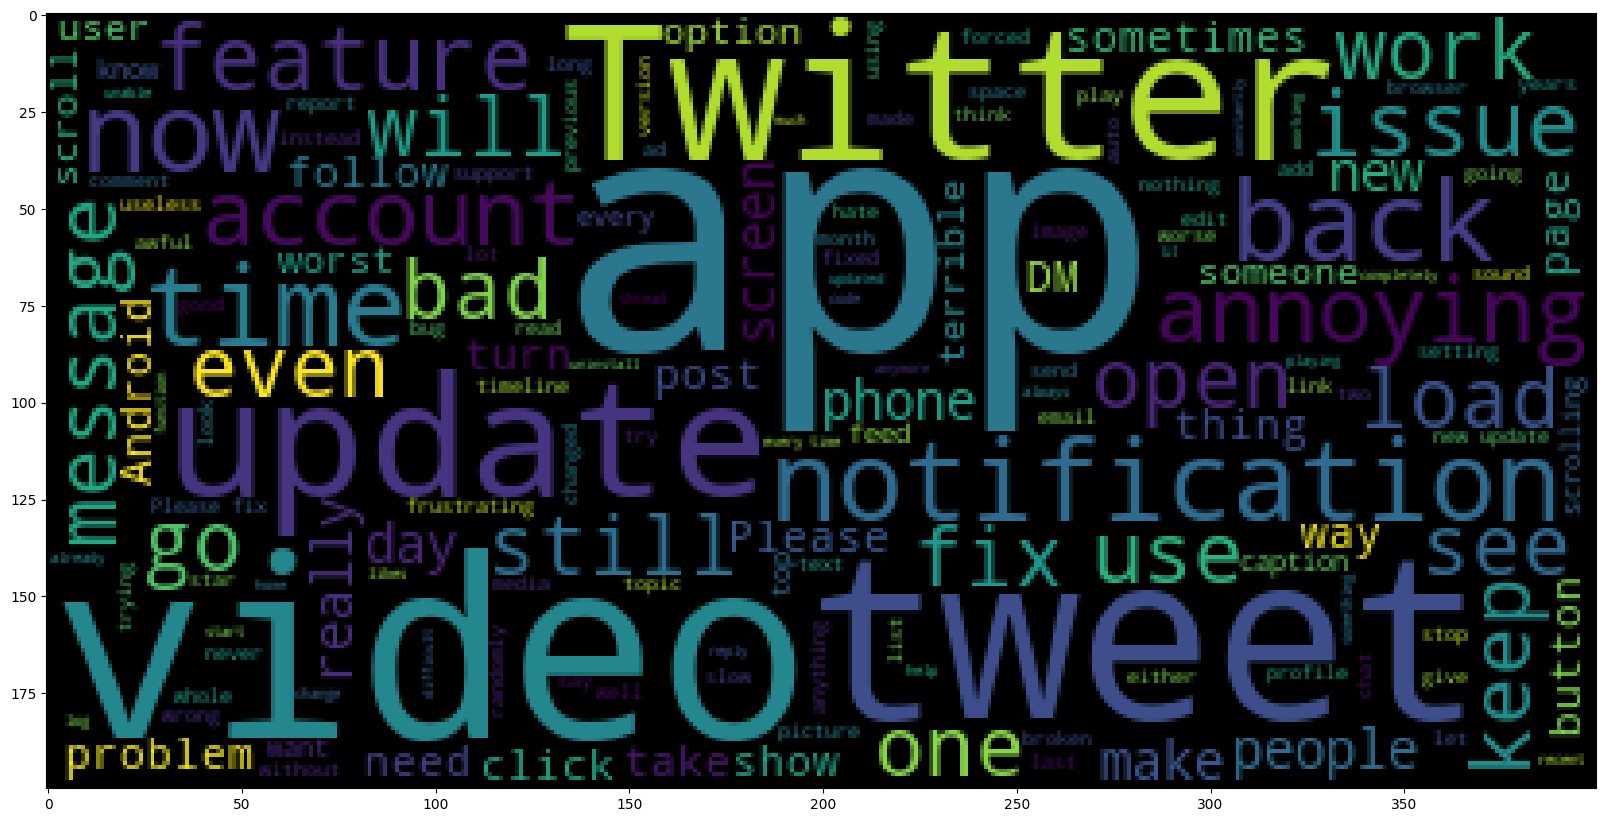

In [17]:
# exibindo WordCloud das palavras negativas
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(negativeParagraph))